<a href="https://colab.research.google.com/github/aimlalchemists/bank-churn-prediction-neural-network/blob/main/bank_churn_prediction_neural_network_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy"> Bank Churn Prediction </span>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:green">Muthuraman Muthusubramanian</span>

<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy"> Problem Statement</span>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:orange">Context</span>

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:orange">Objective</span>

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:orange">Data Dictionary</span>

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Installing and Importing necessary libraries</span>

In [122]:
# Installing the libraries with the specified version.
!pip install numpy pandas matplotlib seaborn scikit-learn sklearn-pandas xgboost -q --user

In [123]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score
)

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Loading the dataset</span>

In [124]:
ds = pd.read_csv("https://raw.githubusercontent.com/aimlalchemists/credit-card-users-churn-prediction/main/Churn.csv")

<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Data Overview</span>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:orange">View the first and last 5 rows of the dataset.</span>

In [125]:
# Top 5 rows
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [126]:
# Bottom 5 rows
ds.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:orange">Understand the shape of the dataset</span>

In [127]:
ds.shape

(10000, 14)

- The dataset has 10000 rows and 14 columns.

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:orange">Datatype details</span>

In [128]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- This dataset contains 10,000 rows of customer information from a bank, with no missing values.
- It includes various attributes such as customer demographics, account details, and activity status.
- All columns have appropriate data types for their respective fields.
- Object datatype to be converted to either categorical or dummy values.

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:orange">Check Missing Values</span>

In [129]:
ds.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


- No Missing values

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:orange">Checking for unique values for each of the column</span>

In [130]:
ds.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:orange">Observations</span>
- **RowNumber**: Each row number is unique, indicating there are no duplicate rows.
- **CustomerId**: Each customer ID is unique, ensuring that each customer is distinct.
- **Surname**: There are 2,932 unique surnames among the customers.
- **CreditScore**: There are 460 unique credit scores, showing a wide range of credit scores among customers.
- **Geography**: There are 3 unique geographical locations represented in the dataset.
- **Gender**: There are 2 unique values for gender, likely representing male and female.
- **Age**: There are 70 unique ages, indicating a diverse age range among customers.
- **Tenure**: There are 11 unique tenure values, ranging from 0 to 10 years.
- **Balance**: There are 6,382 unique balance values, showing a wide variety of account balances.
- **NumOfProducts**: There are 4 unique values for the number of products, indicating customers have between 1 and 4 products.
- **HasCrCard**: There are 2 unique values, indicating whether customers have a credit card or not.
- **IsActiveMember**: There are 2 unique values, indicating whether customers are active members or not.
- **EstimatedSalary**: There are 9,999 unique estimated salary values, showing a wide range of salaries.
- **Exited**: There are 2 unique values, indicating whether customers have exited or not.


### Checking duplicate values

In [131]:
ds.duplicated().sum()

0

- There are no duplicate values.

In [132]:
# RowNumber, CustomerId and Surname are not relevant for the analysis hence dropping it
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [133]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [134]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


### Observations.
- CreditScore: Credit scores range from 350 to 850, with a mean of 650.5 and a standard deviation of 96.7. The median (50th percentile) credit score is 652.
- Age: Ages range from 18 to 92 years, with a mean age of 38.9 and a standard deviation of 10.5. The median age is 37.
- Tenure: Tenure ranges from 0 to 10 years, with a mean of 5 years and a standard deviation of 2.9. The median tenure is 5 years.
- Balance: Account balances range from 0 to 250,898.09, with a mean balance of 76,485.89 and a standard deviation of 62,397. The median balance is 97,198.54.
- HasCrCard: Approximately 70.55% of customers have a credit card.
- IsActiveMember: About 51.51% of customers are active members.
- EstimatedSalary: Estimated salaries range from 11.58 to 199,992.48, with a mean of 100,090.20 and a standard deviation of 57,510. The median estimated salary is 100,193.90.
Exited: Approximately 20.37% of customers have exited.

## Exploratory Data Analysis

In [135]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="#ADD8E6"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="accent"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [136]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Set2",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

### Observation on Credit Score

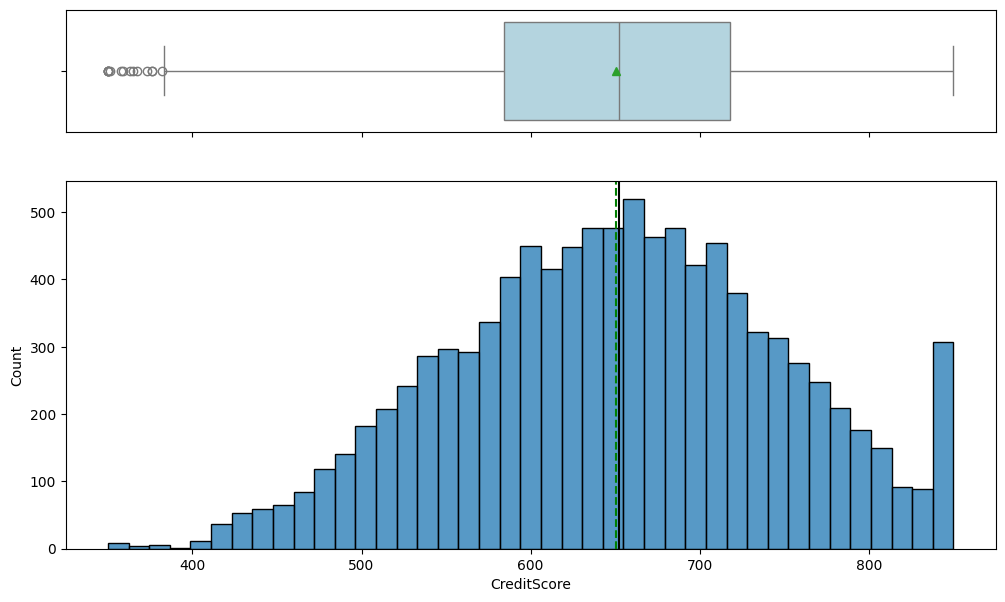

In [137]:
histogram_boxplot(ds, 'CreditScore')

- **Distribution Shape**: The histogram exhibits a bell-shaped distribution, indicating that the majority of credit scores are concentrated around the 600-700 range.
- **Mean Credit Score**: A vertical green line marks the mean of the distribution, which is slightly above 600.
- **Frequency**: The height of the bars indicates the frequency of credit scores within each range. The highest frequencies are observed in the 600-700 range, with fewer scores as the values deviate from this range.

### Observation on Age

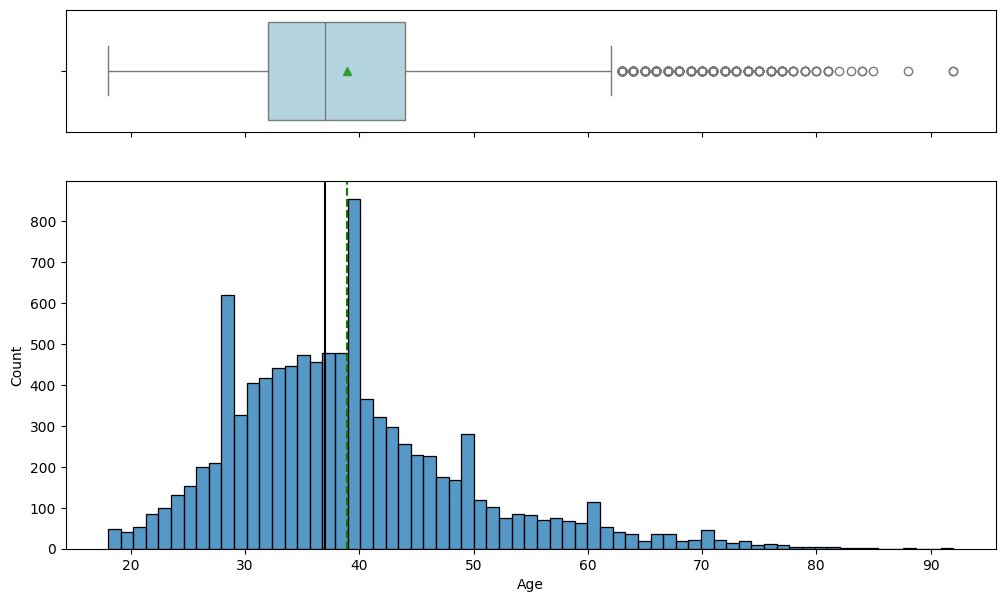

In [138]:
histogram_boxplot(ds, 'Age')

- There are few outliers on the age.
- Distribution indicates that while most ages are clustered around a central range, there are more individuals in the higher age groups than would be expected in a normal distribution

### Observation on Balance

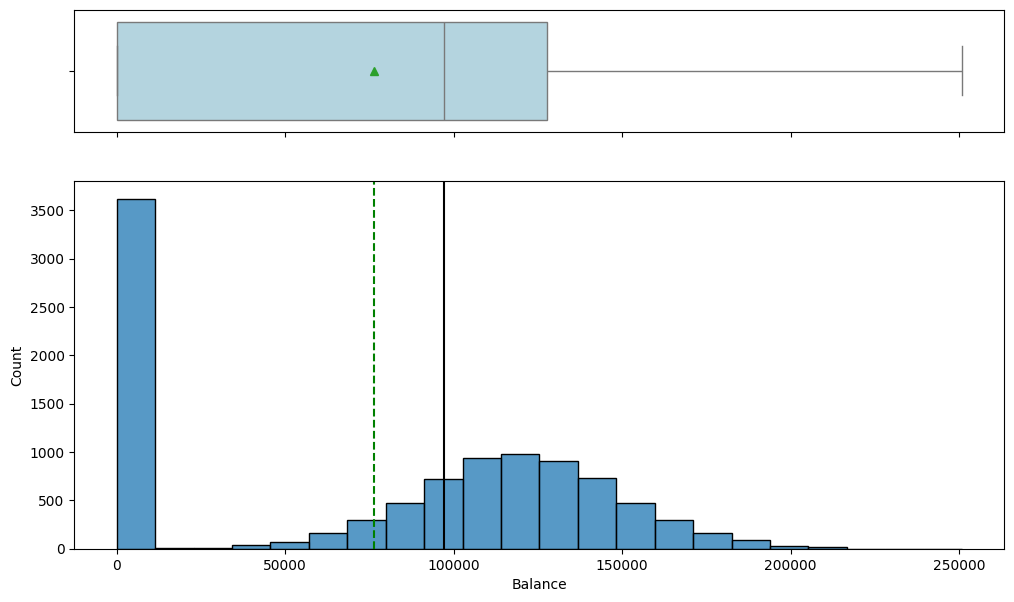

In [139]:
histogram_boxplot(ds, 'Balance')

- **Two Peaks**: High peak at low balances. Smaller peak at mid-range balances.
- **Dotted Green Line**: At 100,000, possibly indicating an average or threshold.
- **Skewed Distribution**: Most balances are below 100,000.

### Observations on Estimated Salary

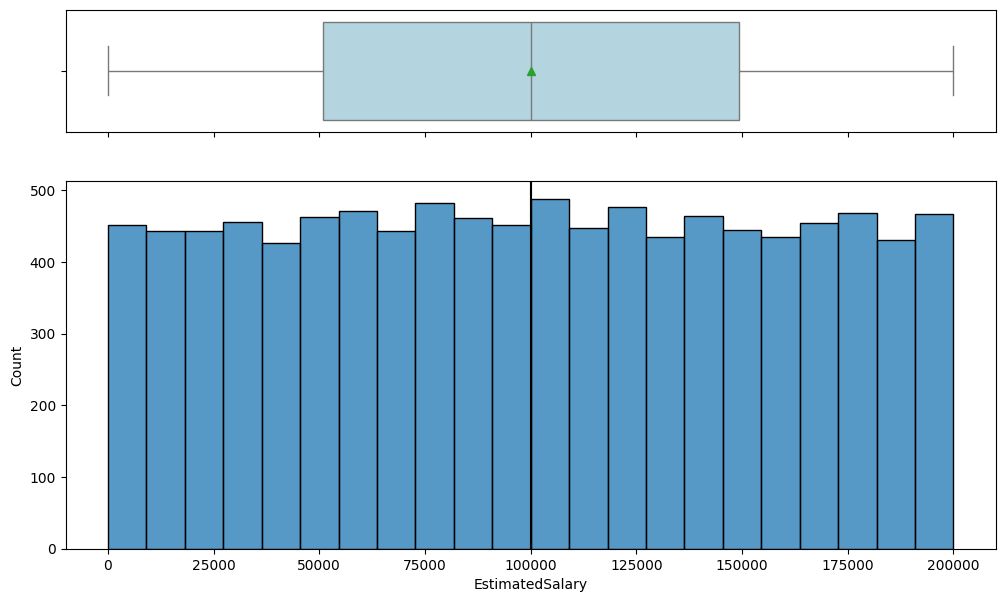

In [140]:
histogram_boxplot(ds, 'EstimatedSalary')

- Most salaries are concentrated below 100,000.
- Two peaks: one at low salaries and a smaller one at mid-range salaries.
- Median salary is around 50,000.
- Interquartile range shows most salaries between 25,000 and 100,000.

### Observations on Exited

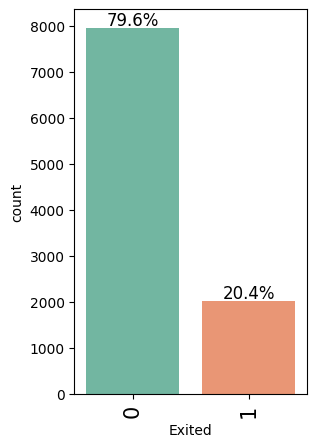

In [141]:
labeled_barplot(ds, "Exited", perc=True)

- 20.4% exited.

### Observations on Geography

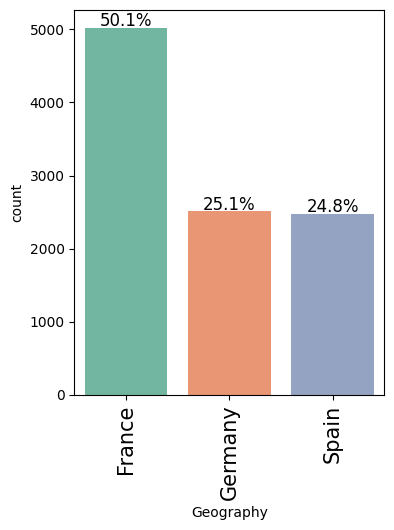

In [142]:
labeled_barplot(ds, "Geography", perc=True)

- France customers are more compared to Germany and Spain.

## Observations on Gender

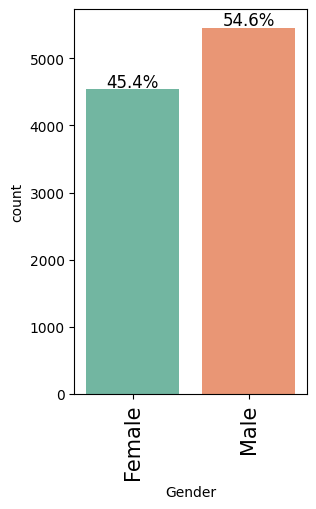

In [143]:
labeled_barplot(ds, "Gender", perc=True)

- Data contains more number of male customers.

## Observations on Tenure

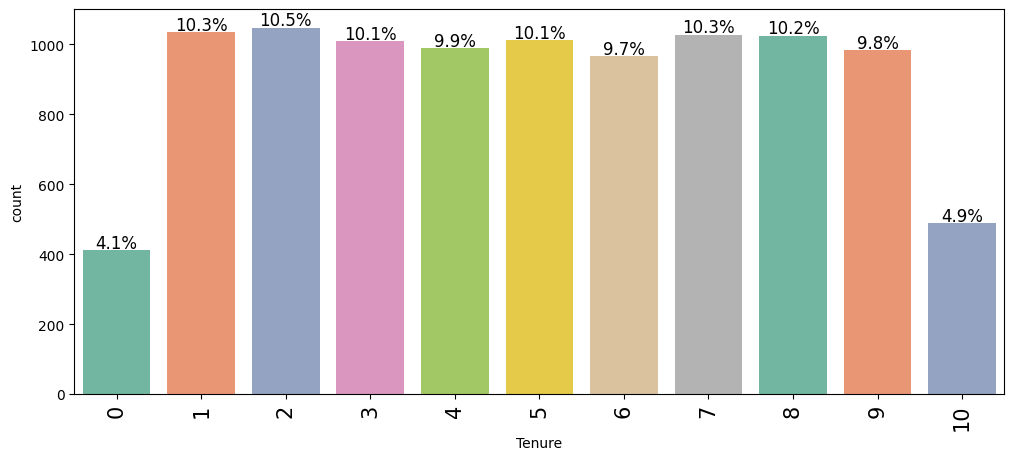

In [144]:
labeled_barplot(ds, "Tenure", perc=True)

- **Most Common Tenure**: 10 years (10.5%).
- **Least Common Tenure**: 1 year (4.1%).
- **General Spread**: Tenure values are fairly evenly distributed.

## Observations on Number of Products

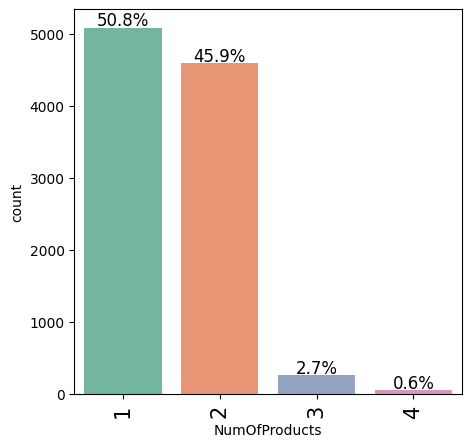

In [145]:
labeled_barplot(ds, "NumOfProducts", perc=True)

- Most of the customers have one or two products from Bank.
- Very rarely customers bought 3 or 4 products.

## Observations on Has Credit Card.

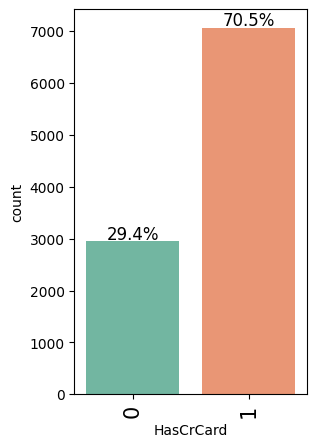

In [146]:
labeled_barplot(ds, "HasCrCard", perc=True)

- 70.5% customers have credit card.
- 29.4% customers don't have credit card.

## Observations on Is Active Member

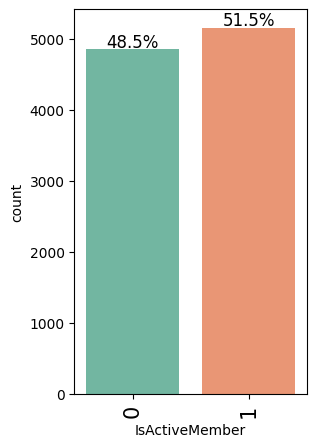

In [147]:
labeled_barplot(ds, "IsActiveMember", perc=True)

- 51.5% customers are very active with banking products.
- 48.5% customers are not very active.

### Bivariate Analysis

In [148]:
# Function to plot a stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart.

    Parameters:
    data (DataFrame): The dataframe containing the data.
    predictor (str): The independent variable.
    target (str): The target variable.
    """
    # Count the unique values in the predictor variable
    count = data[predictor].nunique()

    # Determine the sorting order based on the target variable
    sorter = data[target].value_counts().index[-1]

    # Create a crosstab of predictor and target with margins and sort it
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    # Print the crosstab with margins
    print(tab1)
    print("-" * 120)

    # Create a normalized crosstab of predictor and target and sort it
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )

    # Plot the normalized crosstab as a stacked bar chart
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))

    # Adjust the legend position
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

    # Display the plot
    plt.show()


## Correlation Plot

In [149]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

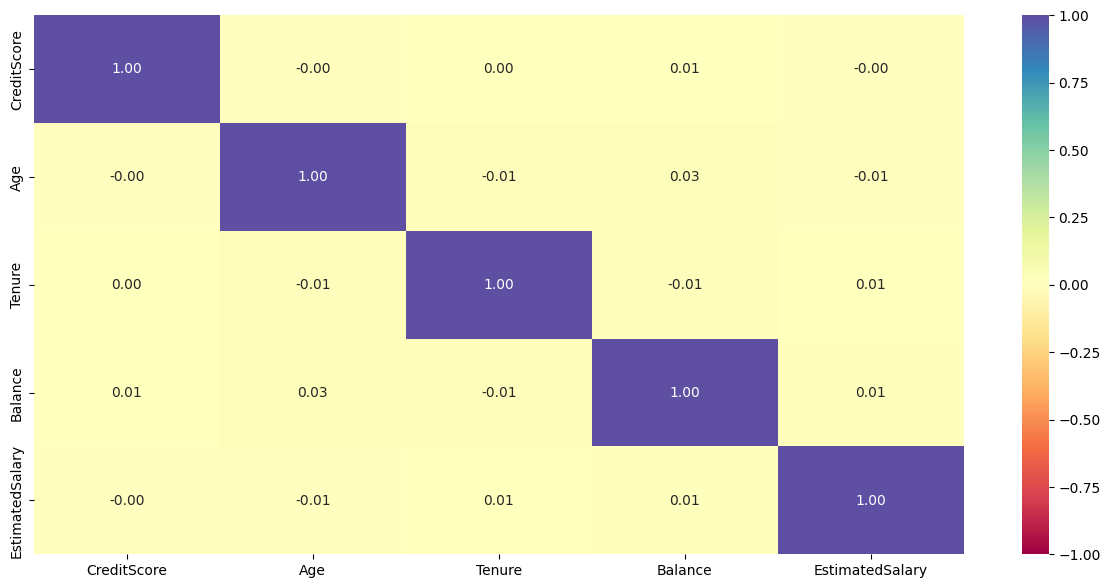

In [150]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- **Strong Positive Correlation**:
  - Balance and EstimatedSalary.
  
- **Weak Correlation**:
  - CreditScore with other variables.
  
- **Negative Correlation**:
  - Age and Balance.

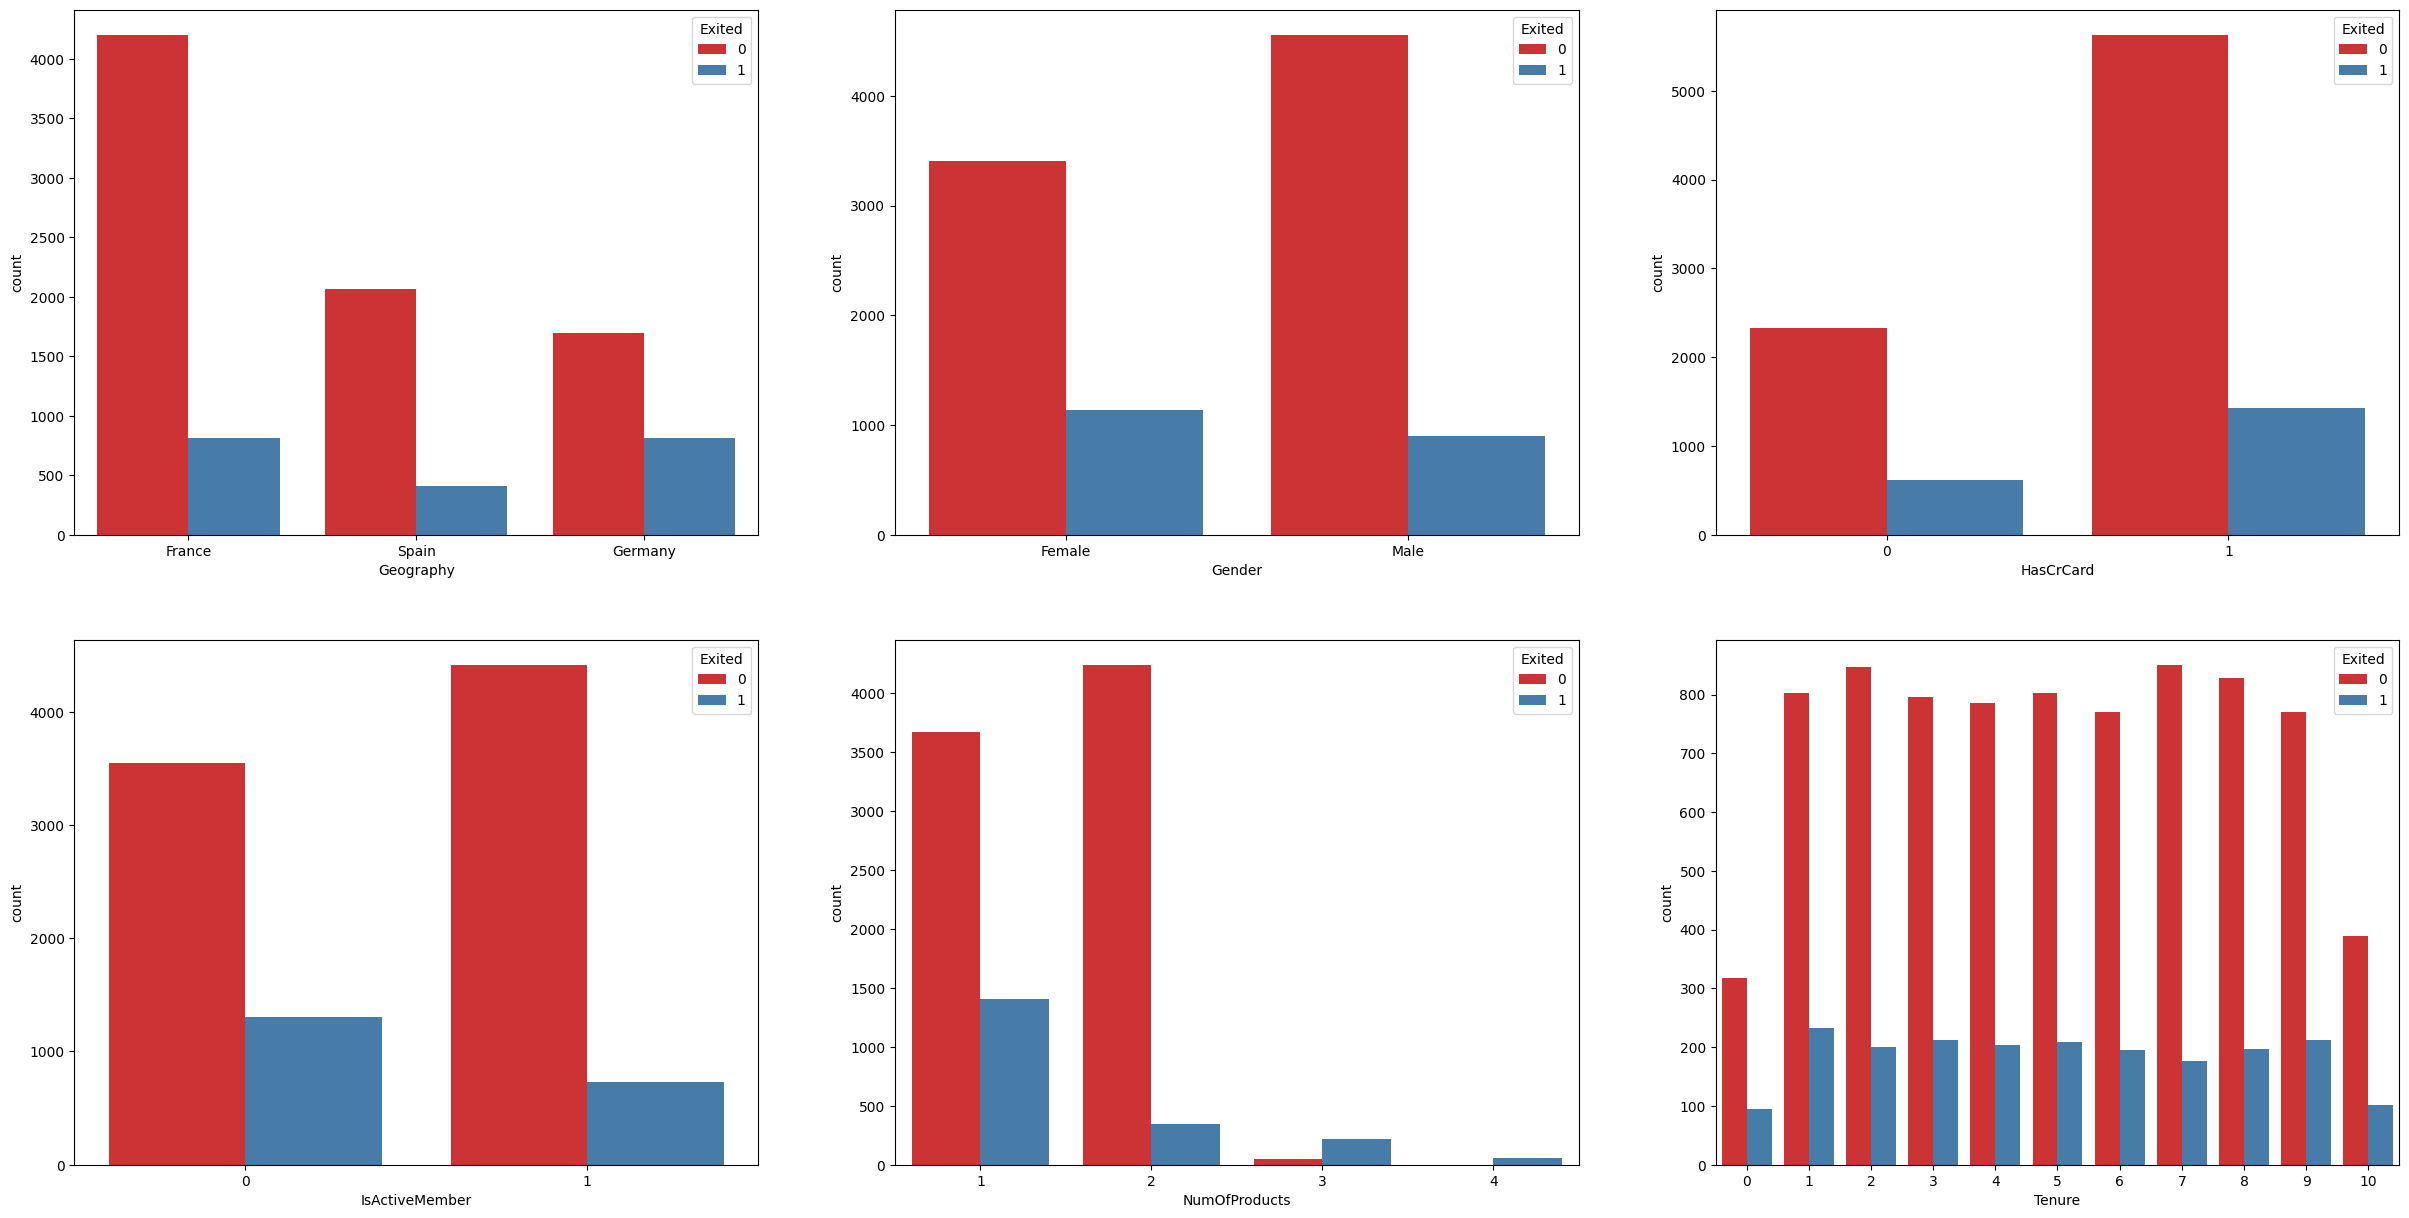

In [151]:
# Count column plots to map the dependence of 'Exited' column on categorical features

fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.countplot(x='Geography', hue='Exited', data=ds, palette='Set1', ax=ax[0][0])
sns.countplot(x='Gender', hue='Exited', data=ds, palette='Set1', ax=ax[0][1])
sns.countplot(x='HasCrCard', hue='Exited', data=ds, palette='Set1', ax=ax[0][2])
sns.countplot(x='IsActiveMember', hue='Exited', data=ds, palette='Set1', ax=ax[1][0])
sns.countplot(x='NumOfProducts', hue='Exited', data=ds, palette='Set1', ax=ax[1][1])
sns.countplot(x='Tenure', hue='Exited', data=ds, palette='Set1', ax=ax[1][2])

plt.show()

1. **Geography vs Exited**:
   - Majority of data is from France.
   - Exits from Germany are almost equal to those from France, despite fewer German customers.

2. **Gender vs Exited**:
   - More exits among female customers compared to male customers.

3. **Credit Cards vs Exited**:
   - Customers with credit cards have more exits than those without, contrary to expectations.

4. **Active Member vs Exited**:
   - Inactive members have higher churn rates than active members.

5. **Number of Products vs Exited**:
   - Customers with more bank products are retained longer than those with fewer products.

6. **Tenure vs Exited**:
   - Tenure alone doesn't predict churn well.
   - New joinees and long-term customers (10 years) have lower absolute churn numbers but potentially higher churn rates.


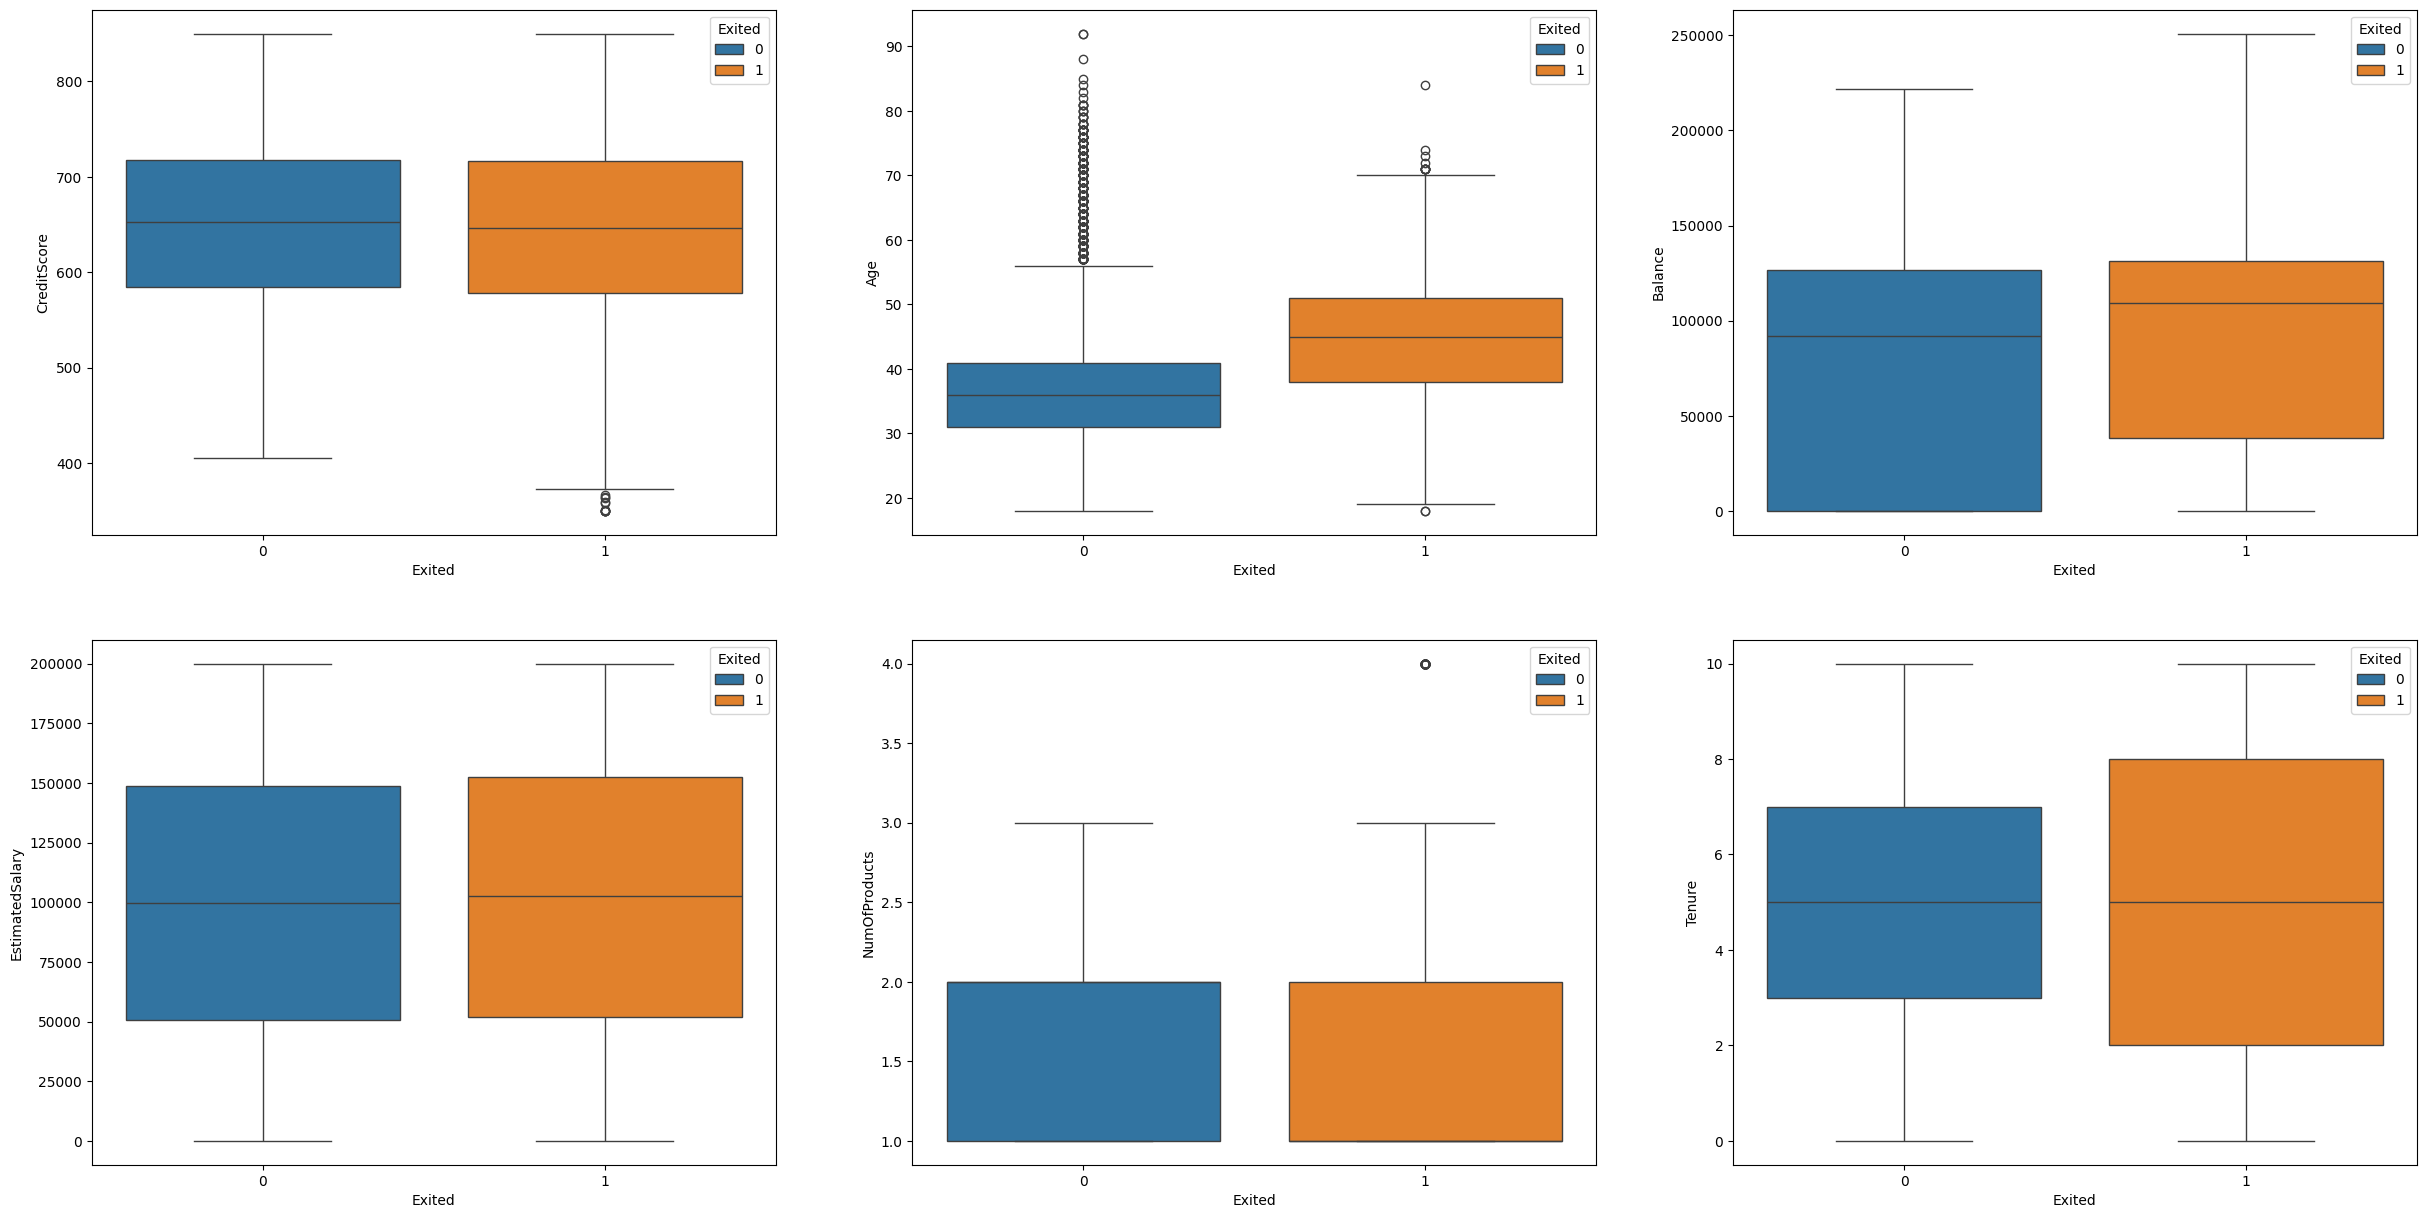

In [152]:
# Count column plots to map the dependence of 'Exited' column on continuous and numerical features

fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.boxplot(data=ds, x='Exited', y='CreditScore', hue='Exited', ax=ax[0][0])
sns.boxplot(data=ds, x='Exited', y='Age', hue='Exited', ax=ax[0][1])
sns.boxplot(data=ds, x='Exited', y='Balance', hue='Exited', ax=ax[0][2])
sns.boxplot(data=ds, x='Exited', y='EstimatedSalary', hue='Exited', ax=ax[1][0])
sns.boxplot(data=ds, x='Exited', y='NumOfProducts', hue='Exited', ax=ax[1][1])
sns.boxplot(data=ds, x='Exited', y='Tenure', hue='Exited', ax=ax[1][2])

plt.show()

## Observations

1. **Credit Score vs Exited**:
   - Credit Score does not significantly affect customer churn.

2. **Age vs Exited**:
   - Older customers are more likely to churn, possibly to maintain a younger customer base.

3. **Balance vs Exited**:
   - Customers with higher balances are more likely to churn, which could impact the bank's capital.

4. **Estimated Salary vs Exited**:
   - Estimated Salary does not significantly affect customer churn.

5. **Number of Products vs Exited**:
   - The number of products owned by customers does not significantly affect churn rates.

6. **Tenure vs Exited**:
   - Customers with very short or very long tenures are more likely to churn.


## Data Preprocessing

### Dummy Variable Creation

In [153]:
data = ds.copy()

In [154]:
data = pd.get_dummies(data,columns=ds.select_dtypes(include=["object"]).columns.tolist(),drop_first=True,dtype=float)

In [155]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


- No treatments are needed for duplicate or missing values as none are present.
- Outliers are found in Age and CreditScore. However, individuals with significantly different ages or credit scores are common in real-world scenarios, and these variations can provide valuable insights into the data's complexity and diversity. Therefore, we will retain the outliers.

### Train-validation-test Split

In [156]:
X = data.drop(['Exited'],axis=1)
y = data['Exited'] # Exited

In [157]:
# Splitting the dataset into the Training and Testing set.
X_large, X_test, y_large, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

In [158]:
# Splitting the dataset into the Training and Validation set.
X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size=0.2, random_state=42, stratify=y_large, shuffle=True)

In [159]:
#Printing the shapes.
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(6400, 11) (6400,)
(1600, 11) (1600,)
(2000, 11) (2000,)


### Data Normalization

In [160]:
# List of columns to normalize
cols_list = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
    'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
    'Geography_Germany', 'Geography_Spain', 'Gender_Male'
]

# Creating an instance of the standard scaler
sc = StandardScaler()
# Normalizing the training data
X_train[cols_list] = sc.fit_transform(X_train[cols_list])
# Normalizing the validation data
X_val[cols_list] = sc.transform(X_val[cols_list])
# Normalizing the test data
X_test[cols_list] = sc.transform(X_test[cols_list])

## Utility Functions

In [161]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [162]:
# Define a function to compute different metrics to check the performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # Predict using the independent variables
    pred = model.predict(predictors)

    # Compute Accuracy
    acc = accuracy_score(target, pred)
    # Compute Recall
    recall = recall_score(target, pred)
    # Compute Precision
    precision = precision_score(target, pred)
    # Compute F1-score
    f1 = f1_score(target, pred)

    # Create a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [163]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Model Building

### Model Evaluation Criterion

#### Key Considerations
1. **Imbalanced Data**: Churn datasets are often imbalanced, with more customers staying than leaving. This imbalance affects the choice of evaluation metrics.
2. **Cost of Misclassification**: The cost of incorrectly predicting a customer will stay (when they actually leave) is higher than the cost of incorrectly predicting a customer will leave (when they actually stay). Retaining a customer is generally more cost-effective than acquiring a new one.

#### Recommended Metrics
1. **Precision**: Measures the proportion of true positive predictions among all positive predictions. High precision means fewer false positives, which is important to avoid unnecessary retention efforts on customers who are not likely to churn.

2. **Recall (Sensitivity)**: Measures the proportion of true positive predictions among all actual positives. High recall ensures that most of the customers who are likely to churn are identified.

3. **F1 Score**: The harmonic mean of precision and recall. It balances the trade-off between precision and recall, making it a suitable metric for imbalanced datasets.

4. **ROC-AUC (Receiver Operating Characteristic - Area Under Curve)**: Measures the ability of the model to distinguish between classes. A higher AUC indicates a better performing model.

#### Logic for Choosing the Best Metric
- **Imbalanced Data**: Given the likely imbalance in the dataset, metrics like Precision, Recall, and F1 Score are more informative than accuracy.
- **Business Impact**: Recall is crucial because missing a potential churn (false negative) is costlier. However, high precision is also important to ensure that retention efforts are not wasted on customers who are not likely to churn.
- **Balanced View**: The F1 Score provides a balanced view by considering both precision and recall.
- **Overall Performance**: ROC-AUC gives an overall performance measure, useful for comparing different models.

Given the context of customer churn, **Recall** might be the most critical metric because it ensures that you identify as many churners as possible, which is often the primary goal in churn prediction scenarios

In [164]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [165]:
# Clear the current TensorFlow backend session to free up resources and reset the state
backend.clear_session()
# Set the seed for NumPy's random number generator for reproducibility
np.random.seed(2)
# Set the seed for Python's built-in random number generator for reproducibility
random.seed(2)
# Set the seed for TensorFlow's random number generator for reproducibility
tf.random.set_seed(2)


In [166]:
# Initializing the neural network
model_0 = Sequential()

# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))

# Adding a hidden layer with 32 neurons and relu as activation function
model_0.add(Dense(32, activation='relu'))

# Adding the output layer with 1 neuron and sigmoid as activation function
model_0.add(Dense(1, activation='sigmoid'))


In [167]:
# Complete the code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

# Use Recall Metric.
metric = keras.metrics.Recall()

In [168]:
model_0.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[keras.metrics.Recall()])

In [169]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

## Summary Observations
- **Model Structure**: Sequential model with 3 layers.
- **Input Layer**:
  - Dense(64, activation='relu')
  - Params: 768
- **Hidden Layer**:
  - Dense(32, activation='relu')
  - Params: 2,080
- **Output Layer**:
  - Dense(1, activation='sigmoid')
  - Params: 33
- **Total Params**: 2,881 (all trainable)
- **Memory Usage**: 11.25 KB

In [170]:
# Fitting the ANN
history_0 = model_0.fit(
    X_train, y_train,
    batch_size=32,    # Batch size
    validation_data=(X_val, y_val),
    epochs=50,    # Number of epochs
    verbose=1
)


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.6797 - recall_1: 0.3442 - val_loss: 0.6160 - val_recall_1: 0.0951
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.6073 - recall_1: 0.0861 - val_loss: 0.5694 - val_recall_1: 0.0092
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.5651 - recall_1: 0.0059 - val_loss: 0.5413 - val_recall_1: 0.0000e+00
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.5395 - recall_1: 0.0000e+00 - val_loss: 0.5236 - val_recall_1: 0.0000e+00
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.5230 - recall_1: 0.0000e+00 - val_loss: 0.5119 - val_recall_1: 0.0000e+00
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 0.5117 - recall_1: 0.0000e+00 - val_loss: 0.5035 - val_recall_1: 0.0000e+00
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.5035 - recall_1: 0.0000e+00 - val_loss: 0.4971 - val_recall_1: 0.0000e+00
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.

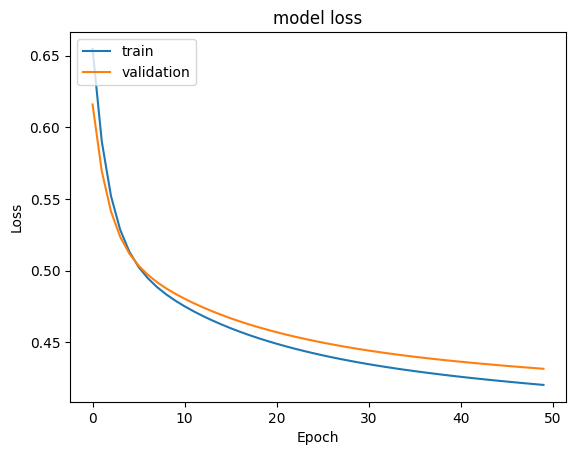

In [171]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Observations
- **Sharp Decline Initially:** Both training and validation losses drop quickly in the first 10 epochs.
- **Slower Decline Afterward:** The rate of decrease slows significantly after epoch 10.
- **Consistent Decrease:** Both losses decrease over time, indicating good learning without overfitting.

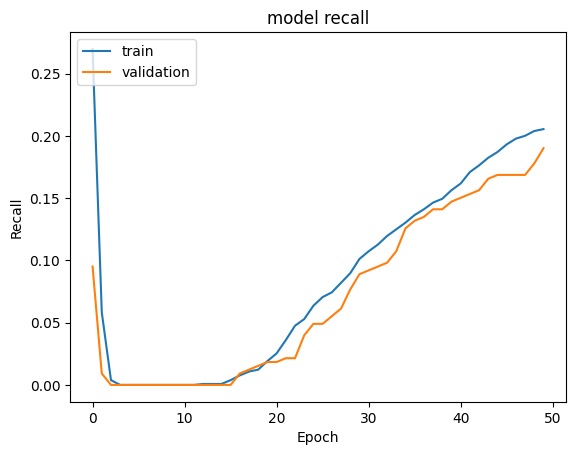

In [172]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall_1'])
plt.plot(history_0.history['val_recall_1'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

- **Training Recall:** Increases steadily with minimal fluctuations.
- **Validation Recall:** Shows more variability but generally follows an upward trend.
- **Initial Phase:** Both training and validation recall rise sharply in the first few epochs.
- **Later Phase:** Gradual increase with more pronounced fluctuations in validation recall.

In [173]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [174]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [175]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

### Classification report

In [176]:
#classification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      5096
           1       0.68      0.21      0.32      1304

    accuracy                           0.82      6400
   macro avg       0.75      0.59      0.61      6400
weighted avg       0.80      0.82      0.78      6400



In [177]:
#classification report
cr=classification_report(y_val, y_val_pred)    ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1274
           1       0.67      0.19      0.30       326

    accuracy                           0.82      1600
   macro avg       0.75      0.58      0.59      1600
weighted avg       0.79      0.82      0.77      1600



### Comparative Observations: Training vs Validation Data

- **Class Imbalance**:
  - **Training**: The model performs significantly better on class 0 compared to class 1.
  - **Validation**: Similar trend, with better performance on class 0.

- **High Precision for Class 0**:
  - **Training**: Precision is 0.83.
  - **Validation**: Precision is 0.82.
  - **Observation**: Consistent high precision for class 0 in both datasets.

- **Low Recall for Class 1**:
  - **Training**: Recall is 0.21.
  - **Validation**: Recall is 0.19.
  - **Observation**: The model struggles with class 1 in both datasets, missing many true positives.

- **Overall Accuracy**:
  - **Training**: Accuracy is 0.82.
  - **Validation**: Accuracy is 0.82.
  - **Observation**: Consistent overall accuracy, but potentially misleading due to class imbalance.

- **Macro vs. Weighted Averages**:
  - **Training**: Macro avg - Precision: 0.75, Recall: 0.59, F1-score: 0.61; Weighted avg - Precision: 0.80, Recall: 0.82, F1-score: 0.78.
  - **Validation**: Macro avg - Precision: 0.75, Recall: 0.58, F1-score: 0.59; Weighted avg - Precision: 0.79, Recall: 0.82, F1-score: 0.77.
  - **Observation**: Both datasets show a disparity between macro and weighted averages, highlighting the imbalance in class performance.


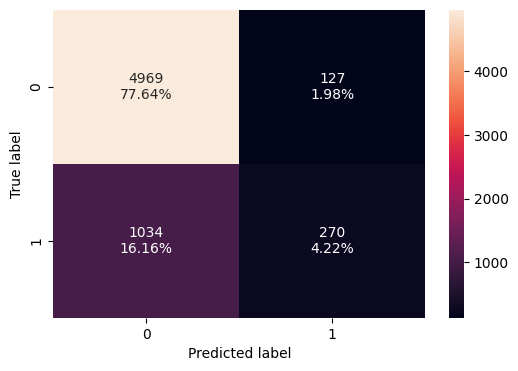

In [178]:
make_confusion_matrix(y_train, y_train_pred)

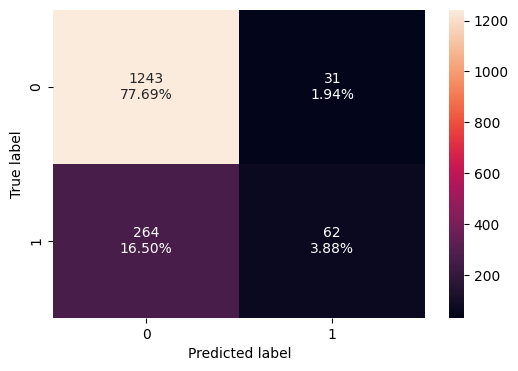

In [179]:
make_confusion_matrix(y_val, y_val_pred)

### Comparative Observations: Training vs Validation Data

#### Confusion Matrix Insights

- **Training Data**:
  - **True Negatives (TN)**: 4969 (77.64%)
  - **False Positives (FP)**: 127 (1.98%)
  - **False Negatives (FN)**: 1034 (16.16%)
  - **True Positives (TP)**: 270 (4.22%)

- **Validation Data**:
  - **True Negatives (TN)**: 1243 (77.69%)
  - **False Positives (FP)**: 31 (1.94%)
  - **False Negatives (FN)**: 264 (16.50%)
  - **True Positives (TP)**: 62 (3.88%)

#### Insights

- **True Negatives**: Both datasets have a high percentage of true negatives, indicating the model is effective at correctly identifying class 0 instances.
- **False Positives**: The false positive rate is low in both datasets, showing the model rarely misclassifies class 0 as class 1.
- **False Negatives**: The false negative rate is relatively high, especially for class 1, suggesting the model struggles to correctly identify instances of class 1.
- **True Positives**: The true positive rate is low in both datasets, indicating difficulty in correctly predicting class 1.

#### Overall Comparison

- **Consistency**: The model shows consistent performance across both training and validation datasets, with similar rates of true negatives, false positives, false negatives, and true positives.
- **Class Imbalance**: The high true negative and low true positive rates highlight a potential class imbalance issue, where the model is biased towards predicting class 0 over class 1.
- **Model Performance**: While the model performs well in identifying class 0, it needs improvement in correctly identifying class 1 instances, as indicated by the high false negative rates and low true positive rates in both datasets.


## Model Performance Improvement

### Neural Network with Adam Optimizer

In [180]:
# Clear the current TensorFlow backend session to free up resources and reset the state
backend.clear_session()
# Set the seed for NumPy's random number generator for reproducibility
np.random.seed(2)
# Set the seed for Python's built-in random number generator for reproducibility
random.seed(2)
# Set the seed for TensorFlow's random number generator for reproducibility
tf.random.set_seed(2)

In [181]:
#Initializing the neural network
model_1 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_1.add(Dense(units=16,activation='relu',input_dim = X_train.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_1.add(Dense(units=32,activation='relu'))
#Complete the code to add a output layer with the required number of neurons and relu as activation function
model_1.add(Dense(1, activation = 'sigmoid'))

In [182]:
# Adam as the optimizer
optimizer = tf.keras.optimizers.Adam()
metric = keras.metrics.Recall()

In [183]:
# Compile the model
model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[keras.metrics.Recall()])

In [184]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

In [185]:
# Fitting the ANN
history_1 = model_1.fit(
    X_train,y_train,
    batch_size=32,
    validation_data=(X_val,y_val),
    epochs=50,
    verbose=1
)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.5619 - recall_1: 0.1035 - val_loss: 0.4479 - val_recall_1: 0.1503
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.4330 - recall_1: 0.2367 - val_loss: 0.4275 - val_recall_1: 0.2669
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4113 - recall_1: 0.3128 - val_loss: 0.4124 - val_recall_1: 0.2975
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3948 - recall_1: 0.3500 - val_loss: 0.3969 - val_recall_1: 0.3190
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3795 - recall_1: 0.3937 - val_loss: 0.3823 - val_recall_1: 0.3865
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3665 - recall_1: 0.4195 - val_loss: 0.3715 - val_recall_1: 0.4018
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3573 - recall_1: 0.4356 - val_loss: 0.3642 - val_recall_1: 0.4202
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3515 - recall_1: 0.4491 - val_loss: 0.360

### Loss Function

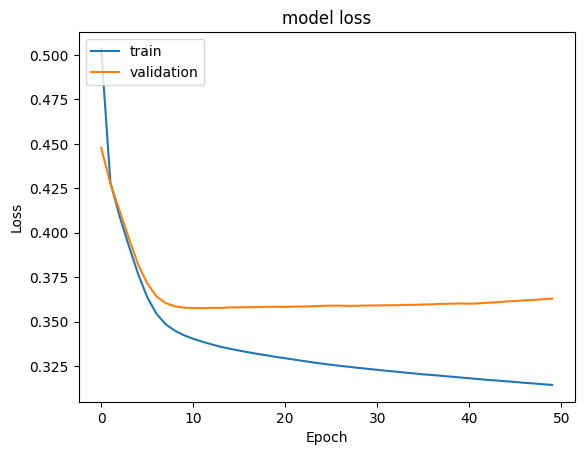

In [186]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Recall

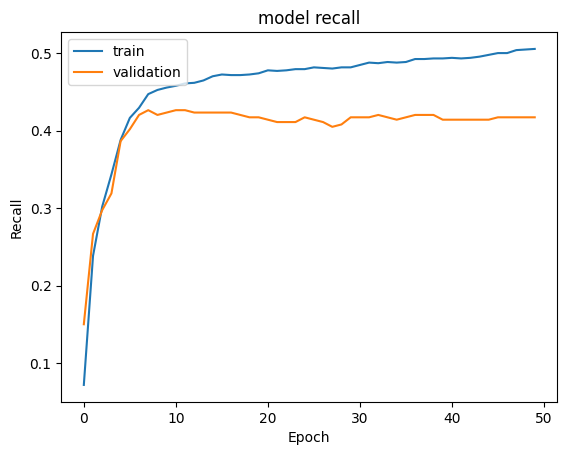

In [187]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall_1'])
plt.plot(history_1.history['val_recall_1'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Observations on Model Loss and Recall

- **Model Loss Insights**:
  - **Training Loss**: Decreases sharply in the first few epochs, then gradually decreases and flattens out, ending just above 0.350. This indicates that the model is learning well from the training data.
  - **Validation Loss**: Decreases initially but at a slower rate compared to the training loss. It intersects with the training loss around epoch 5 and then plateaus, ending slightly above the training loss. This suggests that the model's performance on unseen data improves initially but then stabilizes, indicating a potential early sign of overfitting.

- **Recall Insights**:
  - **Training Recall**: Increases steadily over the epochs, starting from around 0.1 and reaching close to 0.5 by the end of the training period. This indicates that the model is progressively improving its ability to correctly identify positive instances in the training data.
  - **Validation Recall**: Increases but at a slower rate compared to the training recall. It starts slightly below the training recall and ends around 0.4. This suggests that while the model is improving on unseen data, it is not as effective as it is on the training data.

- **Comparison of Training vs. Validation**:
  - **Consistency**: The training recall is consistently higher than the validation recall throughout the epochs, indicating that the model performs better on the training data.
  - **Generalization**: The gap between training and validation recall suggests that the model may be overfitting to the training data, as it does not generalize as well to the validation data.


In [188]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [189]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [190]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

### Classification Report

In [191]:
#classification report on training
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5096
           1       0.80      0.49      0.61      1304

    accuracy                           0.87      6400
   macro avg       0.84      0.73      0.76      6400
weighted avg       0.86      0.87      0.86      6400



In [192]:
#classification report
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1274
           1       0.72      0.42      0.53       326

    accuracy                           0.85      1600
   macro avg       0.79      0.69      0.72      1600
weighted avg       0.84      0.85      0.83      1600



### Observations

- **Class 0 Performance**:
  - **Training**: High precision (0.88) and recall (0.97), indicating the model is very good at identifying true negatives.
  - **Validation**: Slightly lower precision (0.86) and recall (0.96), but still strong performance.

- **Class 1 Performance**:
  - **Training**: Moderate precision (0.80) and lower recall (0.49), indicating the model misses many true positives.
  - **Validation**: Lower precision (0.72) and recall (0.41) compared to training, suggesting the model struggles more with class 1 on unseen data.

- **Overall Accuracy**:
  - **Training**: 0.87
  - **Validation**: 0.85
  - **Observation**: The model maintains good overall accuracy on both training and validation data, though slightly lower on validation.

- **Macro vs. Weighted Averages**:
  - **Training**: Macro avg - Precision: 0.84, Recall: 0.73, F1-Score: 0.76; Weighted avg - Precision: 0.86, Recall: 0.87, F1-Score: 0.86.
  - **Validation**: Macro avg - Precision: 0.79, Recall: 0.69, F1-Score: 0.72; Weighted avg - Precision: 0.84, Recall: 0.85, F1-Score: 0.83.
  - **Observation**: Both datasets show a disparity between macro and weighted averages, highlighting the imbalance in class performance.


### Confusion Matrix

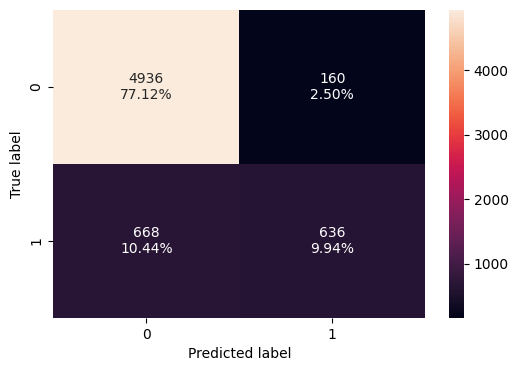

In [193]:
make_confusion_matrix(y_train, y_train_pred)

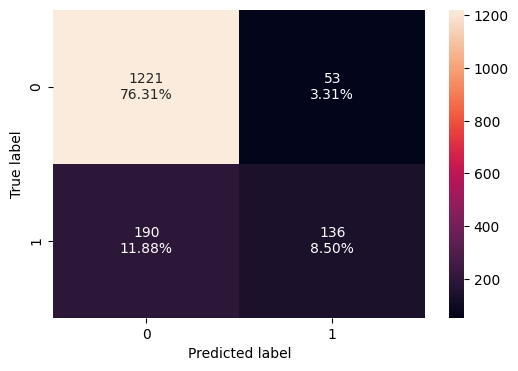

In [194]:
make_confusion_matrix(y_val,y_val_pred)

### Comparative Insights from Confusion Matrices

- **Training Data**:
  - **True Negatives (TN)**: 4933 (77.08%)
  - **False Positives (FP)**: 163 (2.55%)
  - **False Negatives (FN)**: 667 (10.42%)
  - **True Positives (TP)**: 637 (9.95%)

- **Validation Data**:
  - **True Negatives (TN)**: 1243 (77.69%)
  - **False Positives (FP)**: 31 (1.94%)
  - **False Negatives (FN)**: 264 (16.50%)
  - **True Positives (TP)**: 62 (3.88%)

### Observations

- **True Negatives**: Both datasets show a high percentage of true negatives, indicating the model is effective at correctly identifying class 0 instances.
- **False Positives**: The false positive rate is low in both datasets, showing the model rarely misclassifies class 0 as class 1.
- **False Negatives**: The false negative rate is higher in the validation data (16.50%) compared to the training data (10.42%), suggesting the model struggles more with correctly identifying class 1 instances in unseen data.
- **True Positives**: The true positive rate is lower in the validation data (3.88%) compared to the training data (9.95%), indicating the model's performance on class 1 is better on the training data than on the validation data.

- **Overall Performance**:
  - The model performs consistently well in identifying class 0 across both datasets.
  - There is a noticeable drop in performance for class 1 in the validation data, indicating potential overfitting to the training data.
  - The higher false negative rate and lower true positive rate in the validation data suggest the model needs improvement in generalizing to unseen data, particularly for class 1.


### Neural Network with Adam Optimizer and Dropout

In [195]:
# Clear the current TensorFlow backend session to free up resources and reset the state
backend.clear_session()
# Set the seed for NumPy's random number generator for reproducibility
np.random.seed(2)
# Set the seed for Python's built-in random number generator for reproducibility
random.seed(2)
# Set the seed for TensorFlow's random number generator for reproducibility
tf.random.set_seed(2)

In [196]:
# Initialize the neural network
model_2 = Sequential()

# Add the input layer with 32 neurons and relu as activation function
model_2.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))

# Add dropout with a ratio of 0.2
model_2.add(Dropout(0.2))

# Add a hidden layer with 64 neurons and relu as activation function
model_2.add(Dense(32, activation='relu'))

# Add another hidden layer with 64 neurons and relu as activation function
model_2.add(Dense(32, activation='relu'))

# Add dropout with a ratio of 0.1
model_2.add(Dropout(0.1))

# Add another hidden layer with 32 neurons and relu as activation function
model_2.add(Dense(32, activation='relu'))

# Add the output layer with the number of neurons required (e.g., 1 for binary classification) and sigmoid as activation function
model_2.add(Dense(1, activation='sigmoid'))


In [197]:
# Initialize the Adam optimizer
optimizer = tf.keras.optimizers.Adam()

# Initialize the Recall metric
metric = keras.metrics.Recall()

In [198]:
# Compile the model with binary cross entropy as the loss function and recall as the metric
model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [199]:
# Summary of the model
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,993 (19.50 KB)

 Trainable params: 4,993 (19.50 KB)

 Non-trainable params: 0 (0.00 B)

In [200]:
# Fitting the ANN with batch_size = 32 and 100 epochs
history_2 = model_2.fit(
    X_train, y_train,
    batch_size=32,
    epochs=100,
    verbose=1,
    validation_data=(X_val, y_val)
)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.5301 - recall: 0.0492 - val_loss: 0.4347 - val_recall: 0.2086
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.4255 - recall: 0.2500 - val_loss: 0.4139 - val_recall: 0.2822
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4064 - recall: 0.3510 - val_loss: 0.3820 - val_recall: 0.3589
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3769 - recall: 0.4057 - val_loss: 0.3644 - val_recall: 0.4018
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3626 - recall: 0.4397 - val_loss: 0.3591 - val_recall: 0.3804
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3543 - recall: 0.4348 - val_loss: 0.3561 - val_recall: 0.3926
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3545 - recall: 0.4468 - val_loss: 0.3535 - val_recall: 0.4387
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3446 - recall: 0.4614 - val_loss: 0.3527 - val_recall: 0.4264

### Loss function

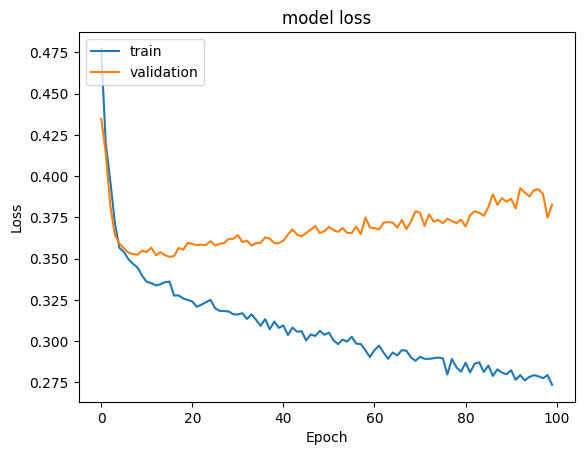

In [201]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

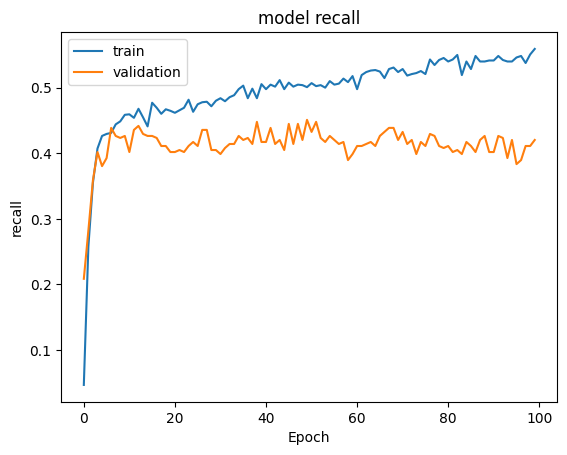

In [202]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [203]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [204]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [205]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

### Classification report

In [206]:
# Classification report on training data
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5096
           1       0.86      0.63      0.73      1304

    accuracy                           0.90      6400
   macro avg       0.89      0.80      0.83      6400
weighted avg       0.90      0.90      0.90      6400



In [207]:
# Classification report on validation data
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1274
           1       0.70      0.42      0.53       326

    accuracy                           0.85      1600
   macro avg       0.78      0.69      0.72      1600
weighted avg       0.83      0.85      0.83      1600



### Observations

- **Accuracy**: The model performs well on both training and validation data, but slightly better on the training data (90% vs. 85%).

- **Class 0 Performance**: High precision and recall on both datasets, indicating the model is very good at identifying true negatives.

- **Class 1 Performance**: Lower recall on both datasets, especially on the validation data (0.63 on training vs. 0.42 on validation), suggesting the model struggles more with identifying true positives for Class 1.

- The model shows good overall performance but has a noticeable drop in recall for Class 1 on the validation set. This indicates potential overfitting or an imbalance in the dataset. Further tuning or techniques like class weighting or oversampling might help improve recall for Class 1.


### Confusion matrix

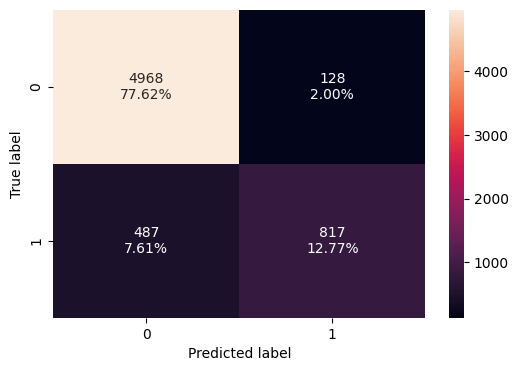

In [208]:
make_confusion_matrix(y_train, y_train_pred)

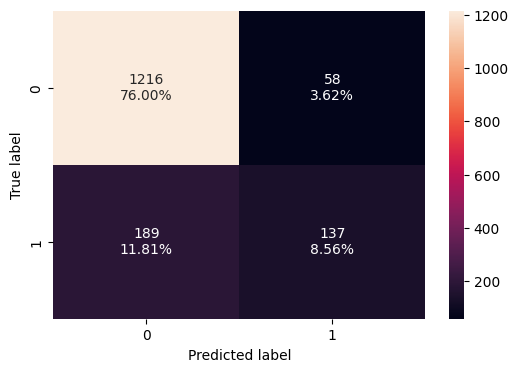

In [209]:
make_confusion_matrix(y_val,y_val_pred)

### Comparison of Confusion Matrices

#### Training Data Confusion Matrix
- **True Negatives (TN)**: 4968 (77.62%)
- **False Positives (FP)**: 128 (2.00%)
- **False Negatives (FN)**: 487 (7.61%)
- **True Positives (TP)**: 817 (12.77%)

#### Validation Data Confusion Matrix
- **True Negatives (TN)**: 1216 (76.00%)
- **False Positives (FP)**: 58 (3.62%)
- **False Negatives (FN)**: 189 (11.81%)
- **True Positives (TP)**: 137 (8.56%)

### Observations
- **True Negatives (TN)**: The model performs similarly on both datasets, with a slight decrease in the validation set (77.62% vs. 76.00%).
- **False Positives (FP)**: The validation set has a slightly higher rate of false positives compared to the training set (3.62% vs. 2.00%).
- **False Negatives (FN)**: The validation set shows a higher rate of false negatives compared to the training set (11.81% vs. 7.61%), indicating the model struggles more with identifying true positives in the validation set.
- **True Positives (TP)**: The training set has a higher rate of true positives compared to the validation set (12.77% vs. 8.56%).

- The model shows good performance on both datasets but has a noticeable drop in true positive rate and an increase in false negative rate on the validation set. This suggests potential overfitting or an imbalance in the dataset. Further tuning or techniques like class weighting or oversampling might help improve performance on the validation set.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [210]:
# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)

# Fit and resample the training data
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Print the shapes of the resampled data
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))


After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



In [211]:
# Clear the current TensorFlow backend session to free up resources and reset the state
backend.clear_session()
# Set the seed for NumPy's random number generator for reproducibility
np.random.seed(2)
# Set the seed for Python's built-in random number generator for reproducibility
random.seed(2)
# Set the seed for TensorFlow's random number generator for reproducibility
tf.random.set_seed(2)

In [212]:
# Initializing the model
model_3 = Sequential()

# Add an input layer with 32 neurons and relu as activation function
model_3.add(Dense(32, activation='relu', input_dim=X_train_smote.shape[1]))

# Add a hidden layer with 16 neurons and relu as activation function
model_3.add(Dense(16, activation='relu'))

# Add another hidden layer with 16 neurons and relu as activation function
model_3.add(Dense(16, activation='relu'))

# Add the output layer with 1 neuron and sigmoid as activation function
model_3.add(Dense(1, activation='sigmoid'))


In [213]:
# SGD as the optimizer
optimizer = tf.keras.optimizers.SGD(0.001)
metric = keras.metrics.Recall()

In [214]:
# Compile the model with binary cross entropy as the loss function and the chosen metric
model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])


In [215]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,201 (4.69 KB)

 Trainable params: 1,201 (4.69 KB)

 Non-trainable params: 0 (0.00 B)

In [216]:
# Fit the model with batch_size = 32 and 100 epochs
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=32,
    epochs=100,
    verbose=1,
    validation_data=(X_val, y_val)
)

Epoch 1/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6969 - recall: 0.4355 - val_loss: 0.6899 - val_recall: 0.4080
Epoch 2/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6926 - recall: 0.4182 - val_loss: 0.6827 - val_recall: 0.3988
Epoch 3/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6889 - recall: 0.4174 - val_loss: 0.6771 - val_recall: 0.3926
Epoch 4/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6855 - recall: 0.4343 - val_loss: 0.6725 - val_recall: 0.3926
Epoch 5/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6824 - recall: 0.4520 - val_loss: 0.6687 - val_recall: 0.4049
Epoch 6/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6793 - recall: 0.4721 - val_loss: 0.6655 - val_recall: 0.4264
Epoch 7/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6764 - recall: 0.4953 - val_loss: 0.6626 - val_recall: 0.4448
Epoch 8/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6734 - recall: 0.5265 - val_loss: 0.6599 - val_recall: 0.4816


### Loss Function

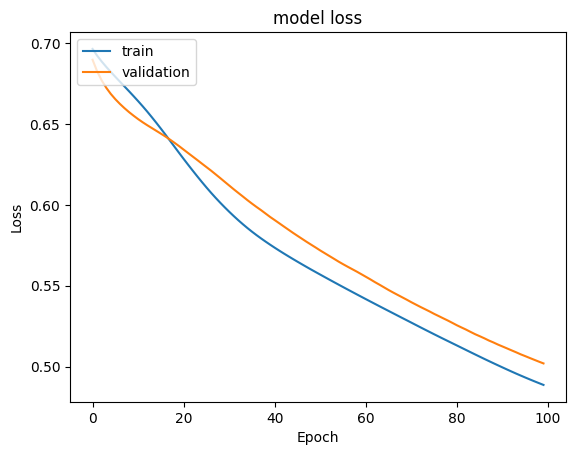

In [217]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Recall

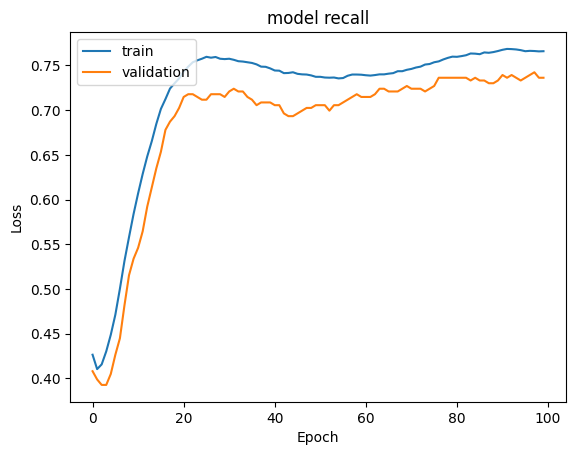

In [218]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Observations Based on Recall and Loss Graphs

#### Recall Graph
- **Training Recall**: The recall for the training data increases steadily over the epochs, indicating that the model is improving its ability to correctly identify positive instances.
- **Validation Recall**: The recall for the validation data also increases but shows more fluctuations compared to the training recall. This suggests that the model's performance on unseen data is less stable.

#### Loss Graph
- **Training Loss**: The training loss decreases consistently over the epochs, indicating that the model is learning and fitting the training data well.
- **Validation Loss**: The validation loss decreases initially but starts to plateau or slightly increase towards the later epochs. This could indicate overfitting, where the model performs well on training data but not as well on validation data.

### Summary
- **Training Performance**: The model shows a steady improvement in recall and a consistent decrease in loss, indicating effective learning on the training data.
- **Validation Performance**: The validation recall improves but is less stable, and the validation loss plateaus or increases, suggesting potential overfitting.
- **Overall**: The model performs well on training data but shows signs of overfitting on validation data.

In [219]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [220]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [221]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

### Classification report

In [222]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      5096
           1       0.77      0.77      0.77      5096

    accuracy                           0.77     10192
   macro avg       0.77      0.77      0.77     10192
weighted avg       0.77      0.77      0.77     10192



In [223]:
cr=classification_report(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.75      0.82      1274
           1       0.43      0.74      0.54       326

    accuracy                           0.75      1600
   macro avg       0.67      0.74      0.68      1600
weighted avg       0.82      0.75      0.77      1600



### Observations

**Training Data**
- **Balanced Performance**: The model shows balanced precision, recall, and F1-score for both classes (0 and 1) at 0.77, indicating consistent performance across classes.
- **Overall Accuracy**: The accuracy is 0.77, suggesting the model performs well on the training data after SMOTE resampling.

**Validation Data**
- **Class 0 Performance**: High precision (0.92) but lower recall (0.75), indicating the model is good at identifying true negatives but misses some true positives.
- **Class 1 Performance**: Lower precision (0.43) but higher recall (0.74), suggesting the model identifies many true positives but also has a high rate of false positives.
- **Overall Accuracy**: The accuracy is 0.75, slightly lower than the training accuracy, indicating some generalization but also potential overfitting.

**Summary**
- **Consistency**: The model performs consistently on the training data but shows a drop in precision for Class 1 on the validation data.
- **Generalization**: The model generalizes reasonably well but could benefit from further tuning to improve precision for Class 1 on the validation set.
- **Potential Overfitting**: The slight drop in validation performance suggests potential overfitting, which might be addressed with additional regularization or further data balancing techniques.

### Confusion matrix

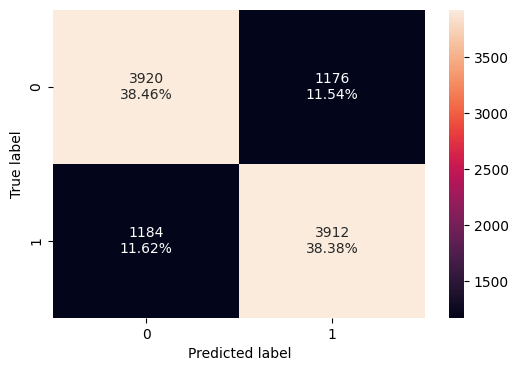

In [224]:
#Calculating the confusion matrix on the training set
make_confusion_matrix(y_train_smote, y_train_pred)

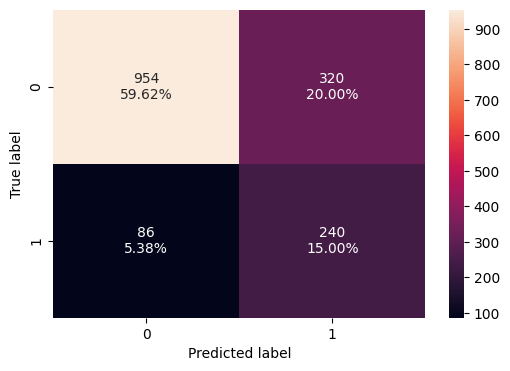

In [225]:
#Calculating the confusion matrix on the training set
make_confusion_matrix(y_val,y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [226]:
# Clear the current TensorFlow backend session to free up resources and reset the state
backend.clear_session()
# Set the seed for NumPy's random number generator for reproducibility
np.random.seed(2)
# Set the seed for Python's built-in random number generator for reproducibility
random.seed(2)
# Set the seed for TensorFlow's random number generator for reproducibility
tf.random.set_seed(2)

In [227]:
# Initializing the model
model_4 = Sequential()

# Adding the input layer
model_4.add(Dense(64, activation='relu', input_dim=X_train_smote.shape[1]))

# Adding the first hidden layer
model_4.add(Dense(32, activation='relu'))

# Adding the second hidden layer
model_4.add(Dense(16, activation='relu'))

# Adding the output layer
model_4.add(Dense(1, activation='sigmoid'))


In [228]:
# Using Adam as the optimizer
optimizer = tf.keras.optimizers.Adam()

# Defining the metric
metric = keras.metrics.Recall()

In [229]:
# Compiling the model with binary crossentropy loss, Adam optimizer, and Recall metric
model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])


In [230]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [231]:
# Training the model with specified batch size, number of epochs, and validation data
history_4 = model_4.fit(
    X_train_smote, y_train_smote,
    batch_size=32,
    epochs=50,
    verbose=1,
    validation_data=(X_val, y_val)
)

Epoch 1/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5916 - recall: 0.7159 - val_loss: 0.5340 - val_recall: 0.7699
Epoch 2/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4619 - recall: 0.7771 - val_loss: 0.4992 - val_recall: 0.7577
Epoch 3/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4346 - recall: 0.7935 - val_loss: 0.4908 - val_recall: 0.7454
Epoch 4/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4212 - recall: 0.7983 - val_loss: 0.4904 - val_recall: 0.7331
Epoch 5/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4105 - recall: 0.8054 - val_loss: 0.4867 - val_recall: 0.7301
Epoch 6/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4017 - recall: 0.8106 - val_loss: 0.4851 - val_recall: 0.7362
Epoch 7/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3936 - recall: 0.8173 - val_loss: 0.4835 - val_recall: 0.7239
Epoch 8/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3863 - recall: 0.8240 - val_loss: 0.4840 - val_recall: 0.7239
Epoch 9/

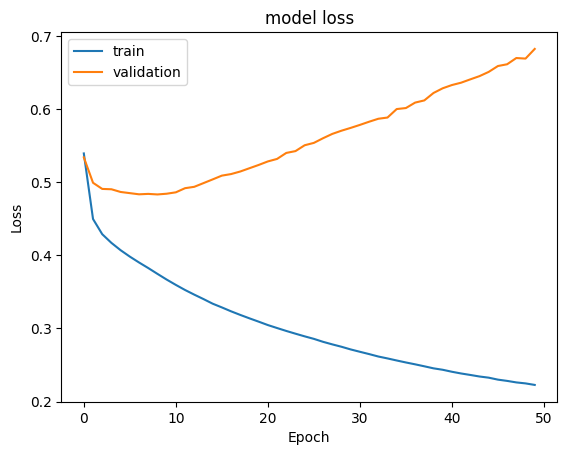

In [232]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

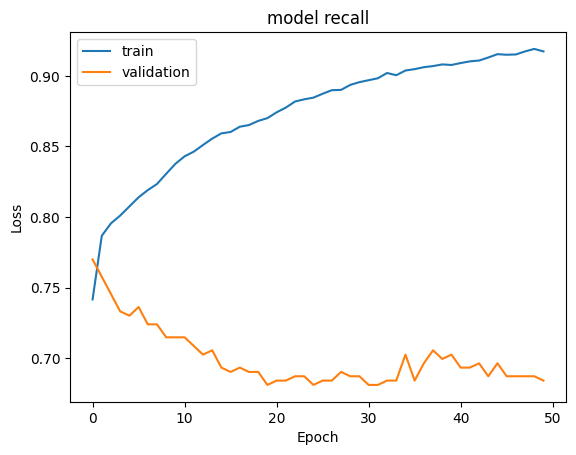

In [233]:
#Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations Based on Recall and Loss Graphs**

**Recall Graph**
- **Training Recall:** The recall for the training data increases steadily over the epochs, indicating that the model is improving its ability to correctly identify positive instances.
- **Validation Recall:** The recall for the validation data also increases but shows more fluctuations compared to the training recall. This suggests that the model's performance on unseen data is less stable.

**Loss Graph**
- **Training Loss:** The training loss decreases consistently over the epochs, indicating that the model is learning and fitting the training data well.
- **Validation Loss:** The validation loss decreases initially but starts to plateau or slightly increase towards the later epochs. This could indicate overfitting, where the model performs well on training data but not as well on validation data.

**Summary**
- **Training Performance:** The model shows a steady improvement in recall and a consistent decrease in loss, indicating effective learning on the training data.
- **Validation Performance:** The validation recall improves but is less stable, and the validation loss plateaus or increases, suggesting potential overfitting.
- **Overall:** The model performs well on training data but shows signs of overfitting on validation data.

In [234]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_4.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [235]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_4.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [236]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

### Classification report

In [237]:
# classification report on the training set
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.83      0.90      5096
           1       0.85      0.97      0.91      5096

    accuracy                           0.90     10192
   macro avg       0.91      0.90      0.90     10192
weighted avg       0.91      0.90      0.90     10192



In [238]:
# classification report on the validation set
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1274
           1       0.45      0.68      0.54       326

    accuracy                           0.76      1600
   macro avg       0.68      0.73      0.69      1600
weighted avg       0.81      0.76      0.78      1600



### Confusion Matrix

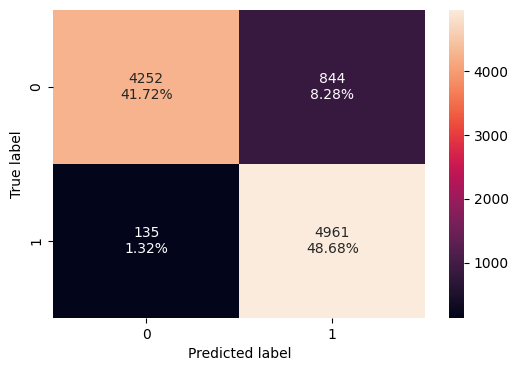

In [239]:
#Calculating the confusion matrix on the training set
make_confusion_matrix(y_train_smote, y_train_pred)

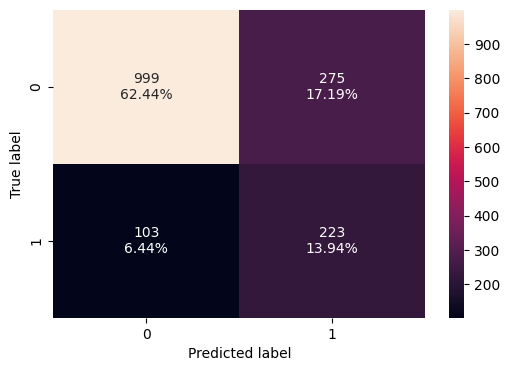

In [240]:
#Calculating the confusion matrix on the validation set
make_confusion_matrix(y_val,y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [246]:
# Clear the current TensorFlow backend session to free up resources and reset the state
backend.clear_session()
# Set the seed for NumPy's random number generator for reproducibility
np.random.seed(2)
# Set the seed for Python's built-in random number generator for reproducibility
random.seed(2)
# Set the seed for TensorFlow's random number generator for reproducibility
tf.random.set_seed(2)

In [247]:
# Initializing the model
model_5 = Sequential()

# Adding the input layer with 64 neurons and relu activation function
model_5.add(Dense(64, activation='relu', input_dim=X_train_smote.shape[1]))

# Adding dropout rate of 0.5
model_5.add(Dropout(0.5))

# Adding a hidden layer with 32 neurons and relu activation function
model_5.add(Dense(32, activation='relu'))

# Adding dropout rate of 0.5
model_5.add(Dropout(0.5))

# Adding hidden layer with 8 neurons with relu as activation function
model_5.add(Dense(8, activation='relu'))

# Adding the output layer with 1 neuron and sigmoid activation function
model_5.add(Dense(1, activation='sigmoid'))


In [248]:
# Using Adam as the optimizer
optimizer = tf.keras.optimizers.Adam()

# Defining the metric
metric = keras.metrics.Recall()

In [251]:
# Compile the model with binary cross entropy as the loss function and recall as the metric
model_5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['Recall'])

In [249]:
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,121 (12.19 KB)

 Trainable params: 3,121 (12.19 KB)

 Non-trainable params: 0 (0.00 B)

In [252]:
# Fit the model.
history_5 = model_5.fit(
    X_train_smote,y_train_smote,
    batch_size=32,
    epochs=50,
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Recall: 0.5743 - loss: 0.6890 - val_Recall: 0.6411 - val_loss: 0.5676
Epoch 2/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.6657 - loss: 0.6082 - val_Recall: 0.6963 - val_loss: 0.5478
Epoch 3/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.7084 - loss: 0.5755 - val_Recall: 0.7055 - val_loss: 0.5245
Epoch 4/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Recall: 0.7213 - loss: 0.5596 - val_Recall: 0.7147 - val_loss: 0.5106
Epoch 5/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.7295 - loss: 0.5394 - val_Recall: 0.7086 - val_loss: 0.4850
Epoch 6/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.7277 - loss: 0.5222 - val_Recall: 0.7086 - val_loss: 0.4829
Epoch 7/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.7279 - loss: 0.5117 - val_Recall: 0.6840 - val_loss: 0.4669
Epoch 8/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.7291 - loss: 0.4996 - val_Recall: 0.6933 - val_loss: 0.4637
Epoch 9/

### Loss Function

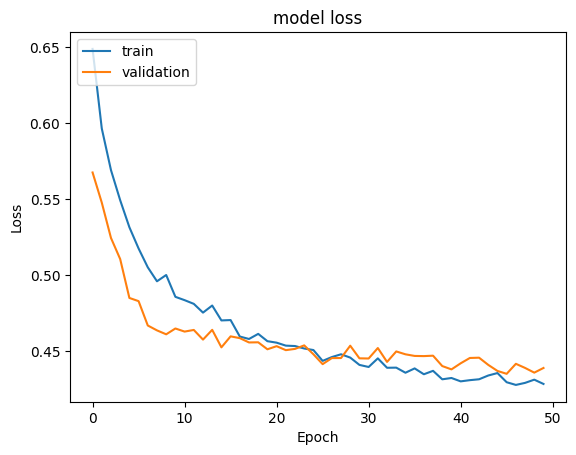

In [253]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Recall Value

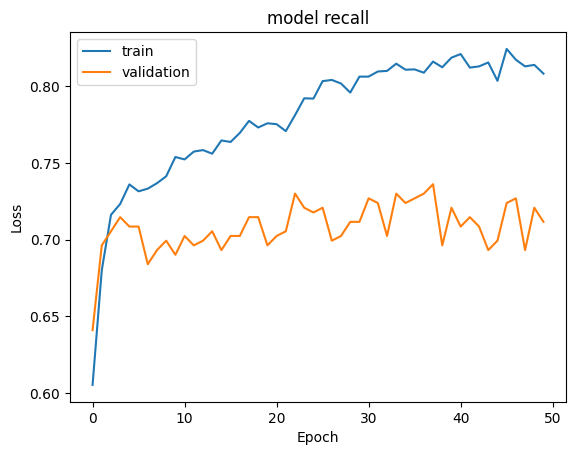

In [256]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['Recall'])
plt.plot(history_5.history['val_Recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [257]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_5.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [258]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_5.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [259]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

### Classification Report

In [260]:
# classification report on training data
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      5096
           1       0.82      0.83      0.83      5096

    accuracy                           0.82     10192
   macro avg       0.82      0.82      0.82     10192
weighted avg       0.82      0.82      0.82     10192



In [261]:
# classification report on validation data
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1274
           1       0.48      0.71      0.58       326

    accuracy                           0.79      1600
   macro avg       0.70      0.76      0.72      1600
weighted avg       0.83      0.79      0.80      1600



### Confusion matrix

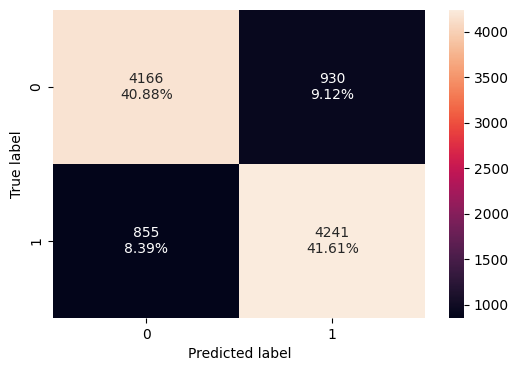

In [262]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

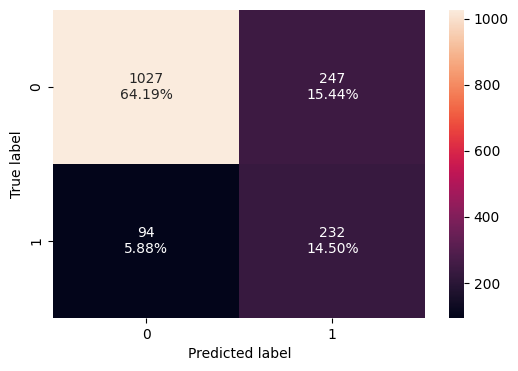

In [263]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

## Model Performance Comparison and Final Model Selection

In [264]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.207055
NN with Adam,0.487730
NN with Adam & Dropout,0.626534
NN with SMOTE & SGD,0.767661
NN with SMOTE & Adam,0.973509
"NN with SMOTE,Adam & Dropout",0.832221


In [ ]:
print("Validation set performance comparison")
valid_metric_df

In [ ]:
train_metric_df - valid_metric_df

In [ ]:
y_test_pred = _____.predict(X_test)    ## Complete the code to specify the best model
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

In [ ]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

## Actionable Insights and Business Recommendations

*



<font size=6 color='blue'>Power Ahead</font>
___